In [1]:
install.packages(c("tidyverse","summarytools","FactoMineR","caret","rpart","randomForest","pROC","ResourceSelection","modEvA",
"survival","haven","survminer","rpart.plot"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘bitops’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘prodlim’, ‘corrplot’, ‘markdown’, ‘RCurl’, ‘png’, ‘jpeg’, ‘lobstr’, ‘reshape’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘zoo’, ‘km.ci’, ‘xtable’, ‘gridtext’, ‘checkmate’, ‘magick’, ‘matrixStats’, ‘pander’, ‘pryr’, ‘rapportools’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggrepel’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘recipes’, ‘reshape2’, ‘pbapply’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘ggtext’


Warning message in install.packag

In [2]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [44]:
dados <- read.csv("/content/dados.csv")

In [45]:
str(dados)

'data.frame':	6620 obs. of  21 variables:
 $ customerID      : chr  "0468-YRPXN" "3865-QBWSJ" "4003-OCTMP" "2091-RFFBA" ...
 $ gender          : chr  "Male" "Male" "Female" "Female" ...
 $ SeniorCitizen   : int  0 1 0 1 1 0 1 1 0 0 ...
 $ Partner         : chr  "No" "No" "Yes" "No" ...
 $ Dependents      : chr  "No" "Yes" "No" "No" ...
 $ tenure          : int  29 38 31 31 14 8 52 7 58 11 ...
 $ PhoneService    : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ MultipleLines   : chr  "No" "Yes" "No" "Yes" ...
 $ InternetService : chr  "Fiber optic" "Fiber optic" "DSL" "Fiber optic" ...
 $ OnlineSecurity  : chr  "No" "Yes" "Yes" "No" ...
 $ OnlineBackup    : chr  "No" "No" "No" "No" ...
 $ DeviceProtection: chr  "Yes" "No" "No" "No" ...
 $ TechSupport     : chr  "Yes" "No" "Yes" "No" ...
 $ StreamingTV     : chr  "Yes" "No" "No" "No" ...
 $ StreamingMovies : chr  "Yes" "No" "Yes" "No" ...
 $ Contract        : chr  "Month-to-month" "Month-to-month" "One year" "Month-to-month" ...
 $ PaperlessBilling:

In [46]:
dados$SeniorCitizen <- as.character(dados$SeniorCitizen) #corrigindo o tipo da variável

In [47]:
dados <- dados %>% drop_na()

In [48]:
dados$Churn <- ifelse(dados$Churn == "Yes",1,0)

In [8]:
dados$Churn <- as.factor(dados$Churn)

#1. Análise Exploratória

##1.1 - Relação entre as variáveis

In [9]:
#quantidade de churn
table(dados$Churn)
prop.table(table(dados$Churn))


   0    1 
4862 1747 


        0         1 
0.7356635 0.2643365 

In [10]:
#considerando a proporcao de churn por variaveis
lapply(dados[,-c(1,6,19,20,21)], function(x){return(prop.table(table(x, dados$Churn), margin =1))})

$gender
        
x                0         1
  Female 0.7285453 0.2714547
  Male   0.7427024 0.2572976

$SeniorCitizen
   
x           0         1
  0 0.7651844 0.2348156
  1 0.5840297 0.4159703

$Partner
     
x             0         1
  No  0.6713698 0.3286302
  Yes 0.8038665 0.1961335

$Dependents
     
x             0         1
  No  0.6890666 0.3109334
  Yes 0.8445230 0.1554770

$PhoneService
     
x             0         1
  No  0.7515528 0.2484472
  Yes 0.7339480 0.2660520

$MultipleLines
                  
x                          0         1
  No               0.7482759 0.2517241
  No phone service 0.7515528 0.2484472
  Yes              0.7174775 0.2825225

$InternetService
             
x                      0          1
  DSL         0.80989926 0.19010074
  Fiber optic 0.58278604 0.41721396
  No          0.92602931 0.07397069

$OnlineSecurity
                     
x                              0          1
  No                  0.58644789 0.41355211
  No internet servic

Pela tabelas de proporção geradas acima, nota-se que algumas variáveis apresentam proporções diferentes em relação ao churn, sendo elas:



*   Idosos (SeniorCitizen): 
*   Parceria (Partner):
*   Dependentes (Dependents):
*   Serviço de Internet (InternetService):
*   Contrato (Contract):
*   Cobrança (PaperlessBilling):



Porém, ao se analisar certo subgrupo presente em alguma variáveis - "Sem Serviço de Internet (No Internet Service)" - esse fator pode atrapalhar a interpretação.

Esse subgrupo apresenta diferenças muito mais notáveis em relação aos outros possíveis subgrupos e por isso, deve-se levar em consideração o tratamento do caso singular deles, desassociando-os dos demais clientes.

Retirando-os, pode-se notar que outras variáveis também apresentam certa diferença significativa entre os grupos:

*   Segurança Online (OnlineSecurity):
*   Recuperação Online (OnlineBackup):
*   Proteção de aparelho (DeviceProtection):
*   Suporte Técnico (TechSupport):

Todas as demais variáveis não apresentam diferenças significativas em suas proporções para-se afirmar previamente, uma possível relação com o Churn (*realizar teste de hipótese*)

Uma exceção é o subgrupo "**Cheque Eletrônico (Eletronic Check)**" dentro do tipo de pagamento; todos os outros meios são semelhantes com exceção ao mencionado. 

Olhando para as variáveis numéricas:

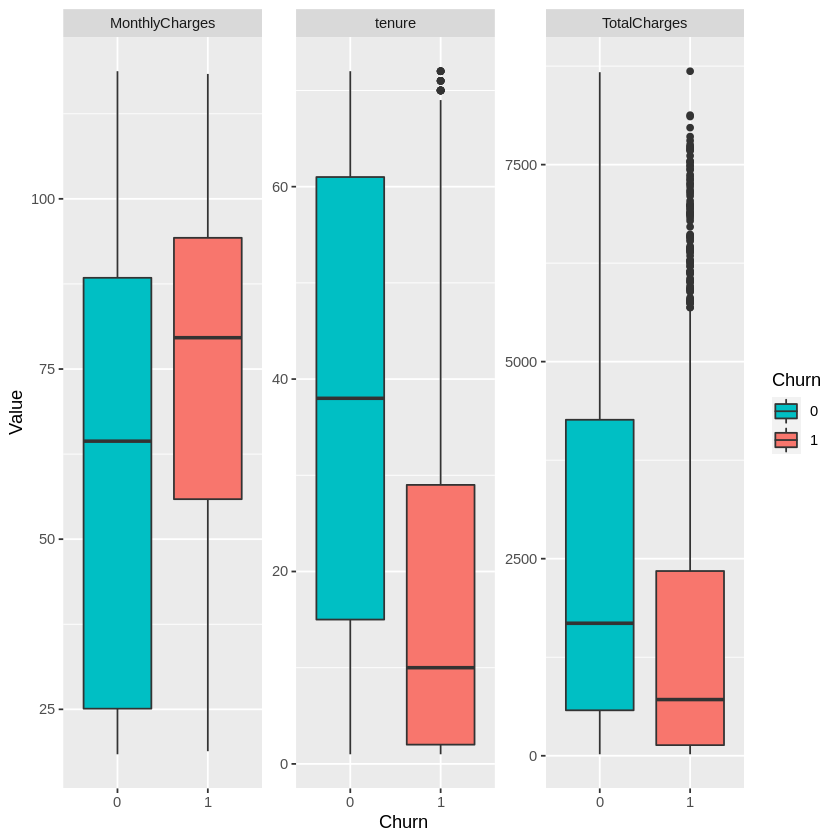

In [12]:
dados %>% select(tenure, MonthlyCharges, TotalCharges, Churn) %>%
  pivot_longer(tenure:TotalCharges, names_to = "Attribute", values_to = "Value") %>%
  ggplot() +
  aes(x = Churn, y = Value, fill = Churn) +
  geom_boxplot(shape = "circle") +
  scale_fill_hue(direction = -1) +
  facet_wrap(~Attribute,scales = "free_y") +
  theme_gray()

In [13]:
t.test(dados$tenure ~ dados$Churn)
t.test(dados$MonthlyCharges ~ dados$Churn)
t.test(dados$TotalCharges ~ dados$Churn)


	Welch Two Sample t-test

data:  dados$tenure by dados$Churn
t = 33.451, df = 3747.1, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 18.37955 20.66821
sample estimates:
mean in group 0 mean in group 1 
       37.68244        18.15856 



	Welch Two Sample t-test

data:  dados$MonthlyCharges by dados$Churn
t = -17.736, df = 3842.7, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -14.60119 -11.69438
sample estimates:
mean in group 0 mean in group 1 
       61.24340        74.39118 



	Welch Two Sample t-test

data:  dados$TotalCharges by dados$Churn
t = 17.752, df = 3732.8, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
  893.8518 1115.8065
sample estimates:
mean in group 0 mean in group 1 
       2555.567        1550.738 


Pela visualização e pelos testes, pode-se observar padrões no comportamento de churn.



1.   Pessoas que abandonaram os serviçõs,no geral, tinham valores mensais maiores do que os que não abandonaram
2.   Nota-se também que eles ficam por um tempo bem menor que os demais
3.   Pelas duas razões anteriores, nota-se que o total que o cliente gera para firma é menor, já que Total Charges = tenure*MonthlyCharges





## 1.2 - Resultados por Grupo

Pela análise anterior, agora temos variáveis que podem ser importantes para o determinante do resultado; agruparemos os resultados (receita) trazida por esses cliente com base nessas variáveis (diferenças mais significativas - variáveis mais gerais).

Divisões:

Variáveis objetivas, referentes à características mais gerais:
> Idosos, Parceiros e Contrato

Variável mais específica, mas que se deve ter atenção:
> Se possui ou não Serviço de internet




In [14]:
# olhando os service internet
dados %>% group_by(InternetService) %>%
summarise(Clientes = n(),yes = sum(Churn == "1"),Total = sum(TotalCharges), MMensal = mean(MonthlyCharges), VMensal = sd(MonthlyCharges)/mean(MonthlyCharges),
MTempo = mean(tenure), VTempo = sd(tenure)/mean(tenure)) %>%
mutate(Churn = yes/Clientes) %>%
select(InternetService,Clientes, Churn, Total, MMensal, VMensal, MTempo, VTempo)

InternetService,Clientes,Churn,Total,MMensal,VMensal,MTempo,VTempo
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DSL,2283,0.19010074,4839446.5,58.09240,0.2803146,32.84056,0.7557243
Fiber optic,2893,0.41721396,9337713.4,91.56234,0.1385098,33.11718,0.7373586
No,1433,0.07397069,957143.6,21.08304,0.1025826,30.81089,0.7913658


nota-se que os clientes são claramente separáveis:

*   Fibra ótica: os mais importantes; trazem em média o maior valor, são a maior quantidade de clientes, porem dão muito churn --> deve ocorrer alguma intervenção
*   DSL: estão em menor quantidade e trazem relativamente menos ganhos do que os fibra ótica, taxa de churn não aparenta ser tão preocupante --> talvez uma intervenção, mas não obrigatória
*   No: a menor quantidade de clientes, trazem pouco ao negócio e a taxa de churn é muito baixa --> nada deve ser feito

Observações: os grupos nao apresentam muita variabilidade em relação as variáveis, 1 - o tempo é muito semelhante entre os grupos (média de 30) e com variabilidade semelhantes (76%). 2 - valors mensais: pela razao dos servicos, ambos apresentam valores diferentes, porem vale-se notar que a variabilidade do grupo DSL é diferente da dos outros grupos (28% comparado a 11%)

In [15]:
# olhando para os seniores #### nao tao importe como a tabela de cime
# verificar quais tabelas sao mais importantes
dados %>% group_by(SeniorCitizen) %>%
summarise(Clientes = n(),yes = sum(Churn == "1"),Total = sum(TotalCharges), MMensal = mean(MonthlyCharges), VMensal = sd(MonthlyCharges)/mean(MonthlyCharges),
MTempo = mean(tenure), VTempo = sd(tenure)/mean(tenure)) %>%
mutate(Churn = yes/Clientes) %>%
select(SeniorCitizen,Clientes, Churn, Total, MMensal, VMensal, MTempo, VTempo)

SeniorCitizen,Clientes,Churn,Total,MMensal,VMensal,MTempo,VTempo
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,5532,0.2348156,12101506,61.77362,0.4907427,32.36985,0.7613880
1,1077,0.4159703,3032797,79.84694,0.2989163,33.30084,0.7245706


eles tem valores parecidos com a tabela; talvez o mix de servicoes seja um que traga mais diferença; velhos tambem podem dar churn devido a idade --> explicitar razoes do chunr

partner: nada muito útil, parceiros ficam apenas mais tempo
idoso: talvez nao seja muito explicativo

partner ~ contract

In [16]:
#contract
dados %>% group_by(Contract) %>%
summarise(Clientes = n(),yes = sum(Churn == "1"),Total = sum(TotalCharges), MMensal = mean(MonthlyCharges), VMensal = sd(MonthlyCharges)/mean(MonthlyCharges),
MTempo = mean(tenure), VTempo = sd(tenure)/mean(tenure)) %>%
mutate(Churn = yes/Clientes) %>%
select(Contract,Clientes, Churn, Total, MMensal, VMensal, MTempo, VTempo)

Contract,Clientes,Churn,Total,MMensal,VMensal,MTempo,VTempo
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Month-to-month,3628,0.42585447,4981831,66.26380,0.4068333,18.06395,0.9794755
One year,1390,0.11151079,4205961,64.89504,0.4906220,42.06691,0.4526538
Two year,1591,0.02954117,5946511,61.04189,0.5687136,57.15022,0.3096075


In [17]:
table(dados$Partner, dados$Contract)

     
      Month-to-month One year Two year
  No            2326      606      470
  Yes           1302      784     1121

possiveis variaveis importantes: partner, internetservice e contract

ver atraves das modelagens qual mais importante, depois melhorar o desenvolvimento desse documento

no slide, apenas o resultado final vai ser descrito; ele nao deve seguir as etapas desse documento


# 2. Prever o churn através de modelagem


preliminares: dividir em treino e teste

In [18]:
library(caret)
library(randomForest)
library(rpart)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [19]:
# dividindo em treino e teste
dados_modelo <- dados
dados_modelo$customerID <- NULL
train_samples <- dados_modelo$Churn %>% createDataPartition(p = 0.75, list = FALSE)
train_data <- dados_modelo[train_samples,]
test_data <- dados_modelo[-train_samples,]

##2.1 - Regressão Logística


In [20]:
reglog <- glm(Churn ~ gender + SeniorCitizen + Partner + Dependents + tenure + PhoneService + 
InternetService + Contract + PaperlessBilling + PaymentMethod + MonthlyCharges + TotalCharges , data = train_data, family = "binomial")

In [21]:
summary(reglog)


Call:
glm(formula = Churn ~ gender + SeniorCitizen + Partner + Dependents + 
    tenure + PhoneService + InternetService + Contract + PaperlessBilling + 
    PaymentMethod + MonthlyCharges + TotalCharges, family = "binomial", 
    data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7505  -0.6909  -0.3008   0.7512   3.4425  

Coefficients:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          -4.096e-01  2.642e-01  -1.551  0.12100    
genderMale                           -3.082e-02  7.668e-02  -0.402  0.68772    
SeniorCitizen1                        2.233e-01  1.001e-01   2.229  0.02578 *  
PartnerYes                            2.472e-02  9.233e-02   0.268  0.78890    
DependentsYes                        -1.572e-01  1.062e-01  -1.479  0.13909    
tenure                               -5.413e-02  7.213e-03  -7.504 6.19e-14 ***
PhoneServiceYes                      -7.179e-01  1.732e-01  

In [22]:
exp(reglog$coefficients)

(Intercept)                           genderMale 
                           0.6639010                            0.9696475 
                      SeniorCitizen1                           PartnerYes 
                           1.2501717                            1.0250281 
                       DependentsYes                               tenure 
                           0.8545662                            0.9473122 
                     PhoneServiceYes           InternetServiceFiber optic 
                           0.4877906                            2.2272903 
                   InternetServiceNo                     ContractOne year 
                           0.7500185                            0.4791383 
                    ContractTwo year                  PaperlessBillingYes 
                           0.2015938                            1.4503508 
PaymentMethodCredit card (automatic)        PaymentMethodElectronic check 
                           0.8580126                            1.5474447 
           PaymentMethodMailed check                       MonthlyCharges 
                           0.9121063                            1.0077380 
                        TotalCharges 
                           1.0002374

pela significancia das variaveis: os mais importantes sao o total gasto pelo cliente, forma de pagamentos, o tipo de contrato e consequentemente o tenure.

o fato de ele ser idoso, traz um pouco de importancia; assim como algumas questoes de suporte

In [23]:
# treinar a eficacia do modelo em classificar o churn
pred1 <- predict(reglog, test_data[,-20])

In [24]:
pred1 <- ifelse(pred1 > 0.5,1,0)

In [25]:
table(test_data[,20], pred1) %>% confusionMatrix()

Confusion Matrix and Statistics

   pred1
       0    1
  0 1145   70
  1  277  159
                                          
               Accuracy : 0.7898          
                 95% CI : (0.7694, 0.8093)
    No Information Rate : 0.8613          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3622          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.8052          
            Specificity : 0.6943          
         Pos Pred Value : 0.9424          
         Neg Pred Value : 0.3647          
             Prevalence : 0.8613          
         Detection Rate : 0.6935          
   Detection Prevalence : 0.7359          
      Balanced Accuracy : 0.7498          
                                          
       'Positive' Class : 0               
                                          

Otimizando para encontrar a melhor solução, assim como reduzir a equação

In [26]:
library(pROC)


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Setting levels: control = 0, case = 1

Setting direction: controls < cases



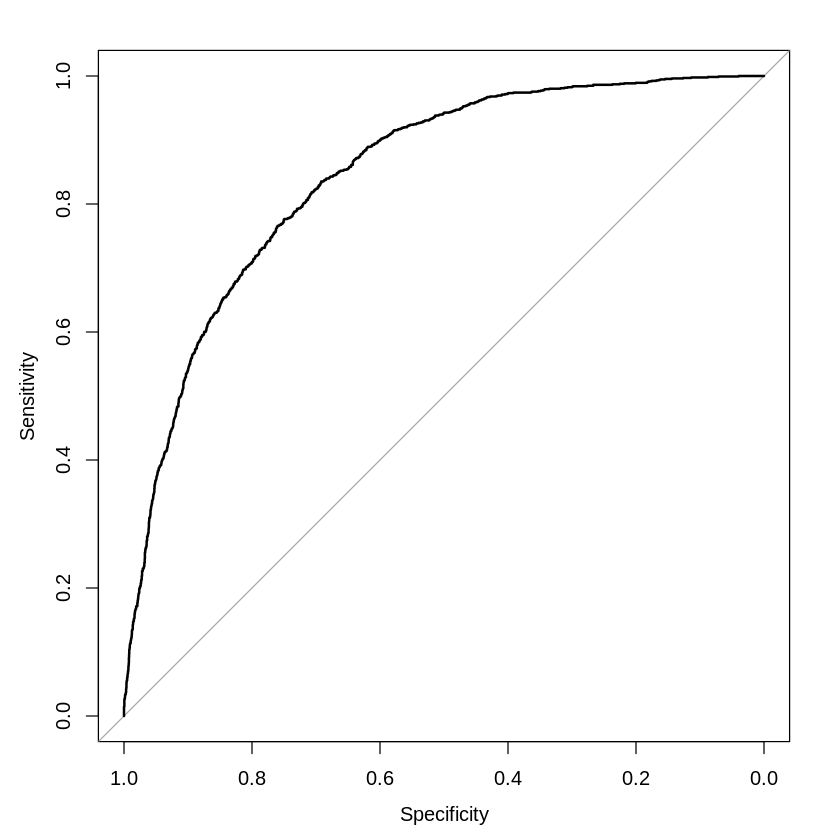

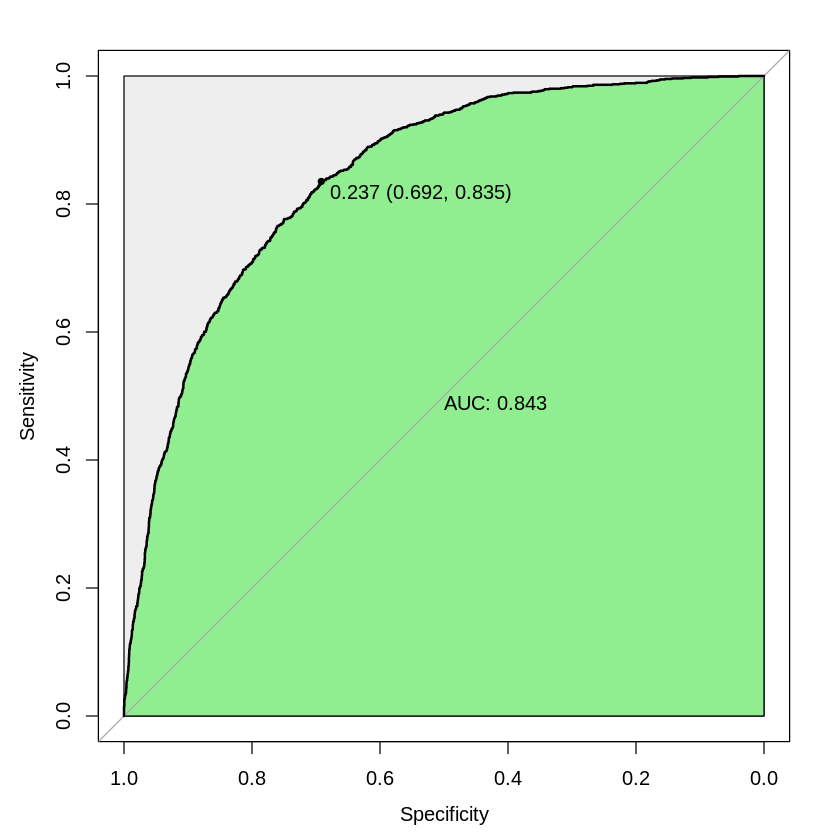

In [27]:
roc1 <- plot.roc(train_data$Churn, fitted(reglog)) #Curva ROC
plot(roc1,print.auc=TRUE, auc.polygon=TRUE, 
     grud=c(0.1,0.2),grid.col=c("green","red"), 
     max.auc.polygon=TRUE, 
     auc.polygon.col="lightgreen", 
     print.thres=TRUE)

O melhor ponto de corte a ser determinado é 0.268

agora, reduzir a equacao

In [28]:
library(ResourceSelection)
library(modEvA)

ResourceSelection 0.3-5 	 2019-07-22



Warning message in Ops.factor(1, y):
“‘-’ not meaningful for factors”



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  train_data$Churn, fitted(reglog)
X-squared = 4958, df = 8, p-value < 2.2e-16


$CoxSnell
[1] 0.2721609

$Nagelkerke
[1] 0.3973008

$McFadden
[1] 0.2749813

$Tjur
[1] 0.2964515

$sqPearson
[1] 0.3002111

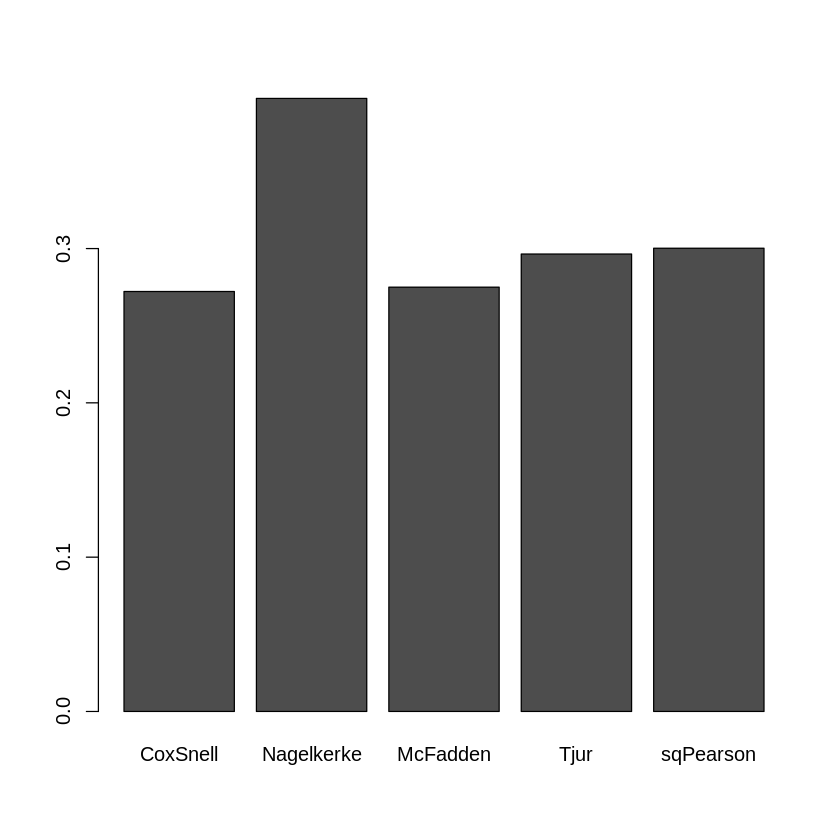

In [29]:
hoslem.test(train_data$Churn, fitted(reglog), g =10) #Hosmer-Lemeshow
RsqGLM(reglog)

In [30]:
# reduzindo a equacao
step(reglog, direction = "both") #stepwise

Start:  AIC=4186.75
Churn ~ gender + SeniorCitizen + Partner + Dependents + tenure + 
    PhoneService + InternetService + Contract + PaperlessBilling + 
    PaymentMethod + MonthlyCharges + TotalCharges

                   Df Deviance    AIC
- Partner           1   4152.8 4184.8
- gender            1   4152.9 4184.9
<none>                  4152.8 4186.8
- Dependents        1   4154.9 4186.9
- MonthlyCharges    1   4155.3 4187.3
- SeniorCitizen     1   4157.7 4189.7
- TotalCharges      1   4161.4 4193.4
- PhoneService      1   4169.7 4201.7
- PaperlessBilling  1   4170.8 4202.8
- InternetService   2   4178.9 4208.9
- PaymentMethod     3   4194.2 4222.2
- tenure            1   4218.1 4250.1
- Contract          2   4234.7 4264.7

Step:  AIC=4184.82
Churn ~ gender + SeniorCitizen + Dependents + tenure + PhoneService + 
    InternetService + Contract + PaperlessBilling + PaymentMethod + 
    MonthlyCharges + TotalCharges

                   Df Deviance    AIC
- gender            1   4153.0


Call:  glm(formula = Churn ~ SeniorCitizen + Dependents + tenure + PhoneService + 
    InternetService + Contract + PaperlessBilling + PaymentMethod + 
    MonthlyCharges + TotalCharges, family = "binomial", data = train_data)

Coefficients:
                         (Intercept)                        SeniorCitizen1  
                          -0.4206381                             0.2263125  
                       DependentsYes                                tenure  
                          -0.1451290                            -0.0540078  
                     PhoneServiceYes            InternetServiceFiber optic  
                          -0.7192903                             0.8025795  
                   InternetServiceNo                      ContractOne year  
                          -0.2873439                            -0.7359327  
                    ContractTwo year                   PaperlessBillingYes  
                          -1.6021382                            

In [31]:
#vif(reglog)

## 2.2 - Decision Tree


In [32]:
decisiont <- rpart(Churn ~., data = train_data)

In [33]:
pred2 <- predict(decisiont, data = test_data[,-20])
pred2 <- pred2 %>% as.data.frame()
colnames(pred2) <- c("zero","one")
pred2 <- pred2 %>% mutate(result= ifelse(zero>one, 1,0))

In [ ]:
table(test_data$Churn, pred2$result) %>% confusionMatrix()

In [35]:
library(rpart.plot)

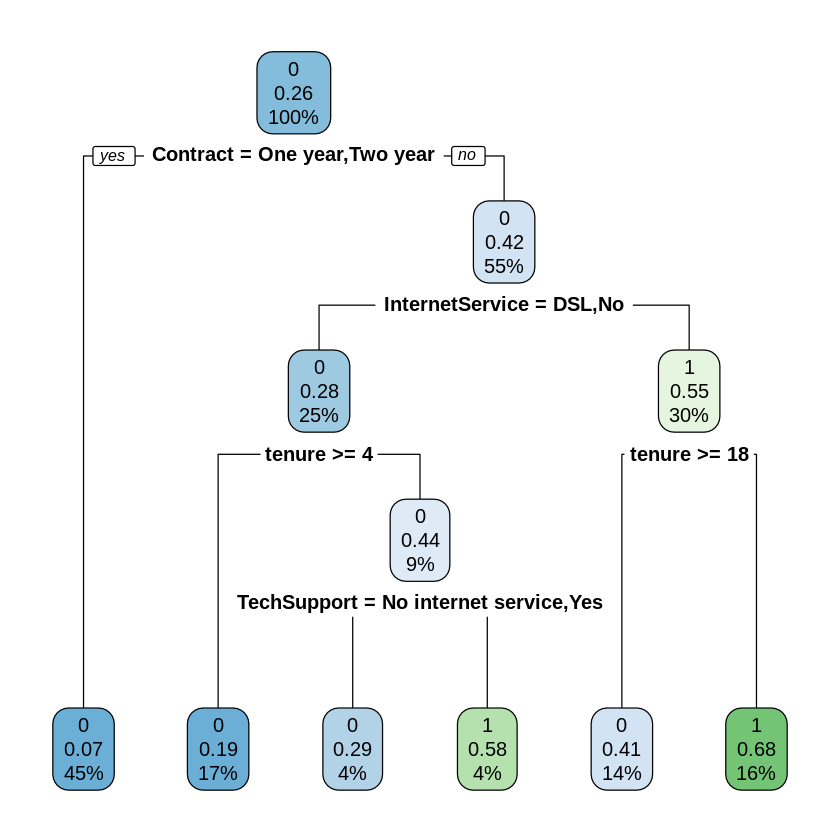

In [36]:
rpart.plot(decisiont)

##2.3 - Random Forest

In [37]:
randomf <- randomForest(Churn ~., data = train_data, ntree = 100)

In [38]:
pred3 <- predict(randomf, data = test_data[,-20])

In [ ]:
table(test_data[,20],pred3) %>% confusionMatrix()

# 3. Análise de Sobrevida


In [ ]:
install.packages(c("ggfortify","ggthemes","scales","survminer","survival"))

In [60]:
library(survival)
library(haven)

In [50]:
library(ggfortify)
library(ggthemes)
library(scales)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [61]:
dados$Churn <- as.integer(dados$Churn)

In [62]:
kmsurvival <- survfit(Surv(dados$tenure, dados$Churn)~1)

Call: survfit(formula = Surv(dados$tenure, dados$Churn) ~ 1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1   6609     350    0.947 0.00275        0.942        0.952
    2   6041     112    0.929 0.00316        0.923        0.936
    3   5818      87    0.916 0.00345        0.909        0.922
    4   5633      80    0.903 0.00369        0.895        0.910
    5   5466      61    0.893 0.00387        0.885        0.900
    6   5340      38    0.886 0.00398        0.878        0.894
    7   5237      45    0.879 0.00410        0.871        0.887
    8   5114      41    0.871 0.00422        0.863        0.880
    9   4996      44    0.864 0.00433        0.855        0.872
   10   4884      40    0.857 0.00444        0.848        0.865
   11   4777      28    0.852 0.00452        0.843        0.861
   12   4682      34    0.846 0.00461        0.837        0.855
   13   4575      36    0.839 0.00470        0.830        0.848
   14   4475      23    0.835 0.00476     

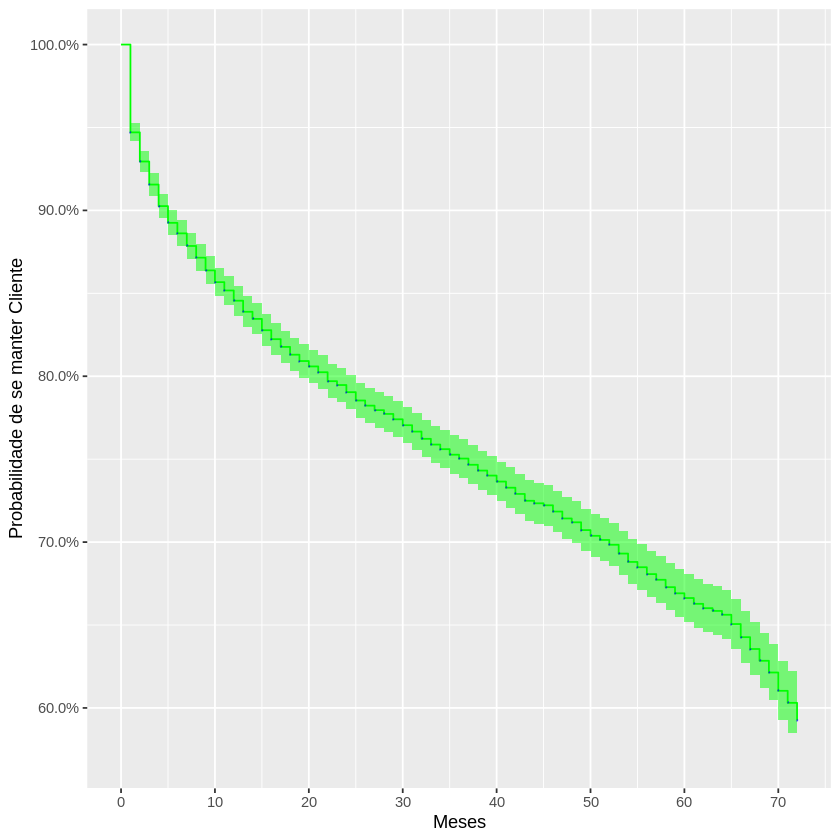

In [63]:
summary(kmsurvival)

autoplot(kmsurvival, censor.shape = "*", censor.size = 1, surv.colour = 'green', censor.colour = 'blue', conf.int.alpha = 0.5) +
theme_gray() + xlab('Meses') + ylab('Probabilidade de se manter Cliente') + scale_x_continuous(breaks = seq(0,80,10))

Call: survfit(formula = Surv(dados$tenure, dados$Churn) ~ dados$Contract)

                dados$Contract=Month-to-month 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1   3628     350    0.904 0.00490       0.8940        0.913
    2   3069     110    0.871 0.00561       0.8602        0.882
    3   2854      87    0.845 0.00612       0.8327        0.857
    4   2678      79    0.820 0.00655       0.8069        0.833
    5   2522      60    0.800 0.00686       0.7868        0.814
    6   2401      38    0.788 0.00706       0.7738        0.801
    7   2310      44    0.773 0.00727       0.7584        0.787
    8   2204      40    0.758 0.00747       0.7440        0.773
    9   2105      44    0.743 0.00769       0.7277        0.758
   10   2005      40    0.728 0.00788       0.7125        0.743
   11   1917      27    0.718 0.00802       0.7020        0.733
   12   1840      29    0.706 0.00816       0.6904        0.722
   13   1762      36    0.692 0.00834       0.

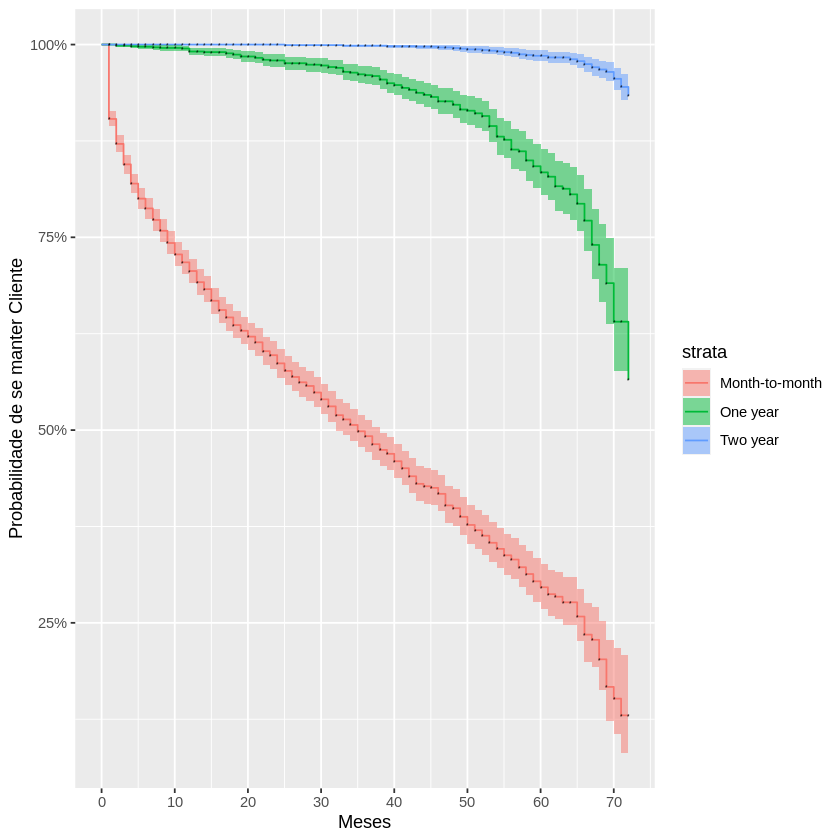

In [64]:
kmsurvivalgroup <- survfit(Surv(dados$tenure, dados$Churn)~dados$Contract) #calculado a função de kaplan-meier por grupo

summary(kmsurvivalgroup) #tabela

autoplot(kmsurvivalgroup, censor.shape = "*", censor.size = 1, conf.int.alpha = 0.5) +
theme_gray() + xlab('Meses') + ylab('Probabilidade de se manter Cliente') + scale_x_continuous(breaks = seq(0,80,10)) #gráfico

teste logrank testa a diferenca das curvas

In [65]:
survdiff(formula = Surv(tenure, Churn) ~ Contract, data = dados)
survdiff(formula = Surv(tenure, Churn) ~ Partner, data = dados)

Call:
survdiff(formula = Surv(tenure, Churn) ~ Contract, data = dados)

                           N Observed Expected (O-E)^2/E (O-E)^2/V
Contract=Month-to-month 3628     1545      657      1200      2176
Contract=One year       1390      155      441       185       254
Contract=Two year       1591       47      649       559       998

 Chisq= 2222  on 2 degrees of freedom, p= <2e-16 

Call:
survdiff(formula = Surv(tenure, Churn) ~ Partner, data = dados)

               N Observed Expected (O-E)^2/E (O-E)^2/V
Partner=No  3402     1118      717       224       400
Partner=Yes 3207      629     1030       156       400

 Chisq= 400  on 1 degrees of freedom, p= <2e-16 

risk ratio: ex-> month to month em relacao a 1 year contract em ate 30 meses: 0,93/0,54 = 1,74, 74% mais chance de dar churn dos month to month em relacao aos 1 year contract

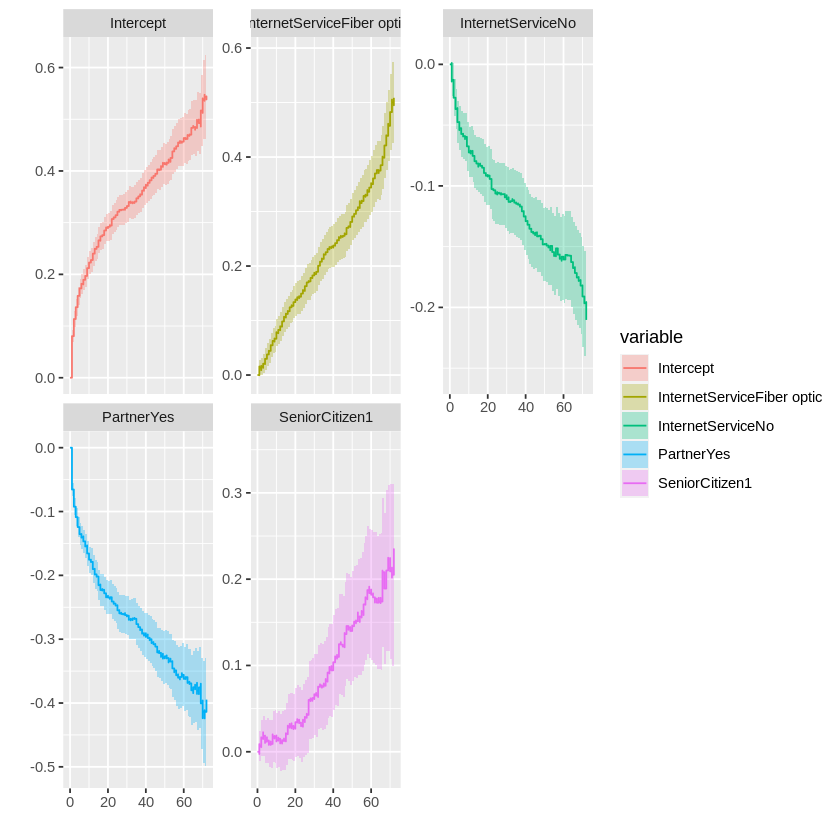

In [66]:
autoplot(aareg(Surv(tenure, Churn) ~  SeniorCitizen + Partner + InternetService, data = dados))

Call: survfit(formula = coxph(Surv(dados$tenure, dados$Churn) ~ 1), 
    type = "aalen")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1   6609     350    0.948 0.00268        0.943        0.954
    2   6041     112    0.931 0.00310        0.925        0.937
    3   5818      87    0.917 0.00339        0.911        0.924
    4   5633      80    0.904 0.00364        0.897        0.911
    5   5466      61    0.894 0.00382        0.887        0.902
    6   5340      38    0.888 0.00393        0.880        0.896
    7   5237      45    0.880 0.00405        0.872        0.888
    8   5114      41    0.873 0.00417        0.865        0.881
    9   4996      44    0.866 0.00429        0.857        0.874
   10   4884      40    0.859 0.00439        0.850        0.867
   11   4777      28    0.854 0.00447        0.845        0.862
   12   4682      34    0.847 0.00456        0.838        0.856
   13   4575      36    0.841 0.00466        0.832        0.850
   14   4475  

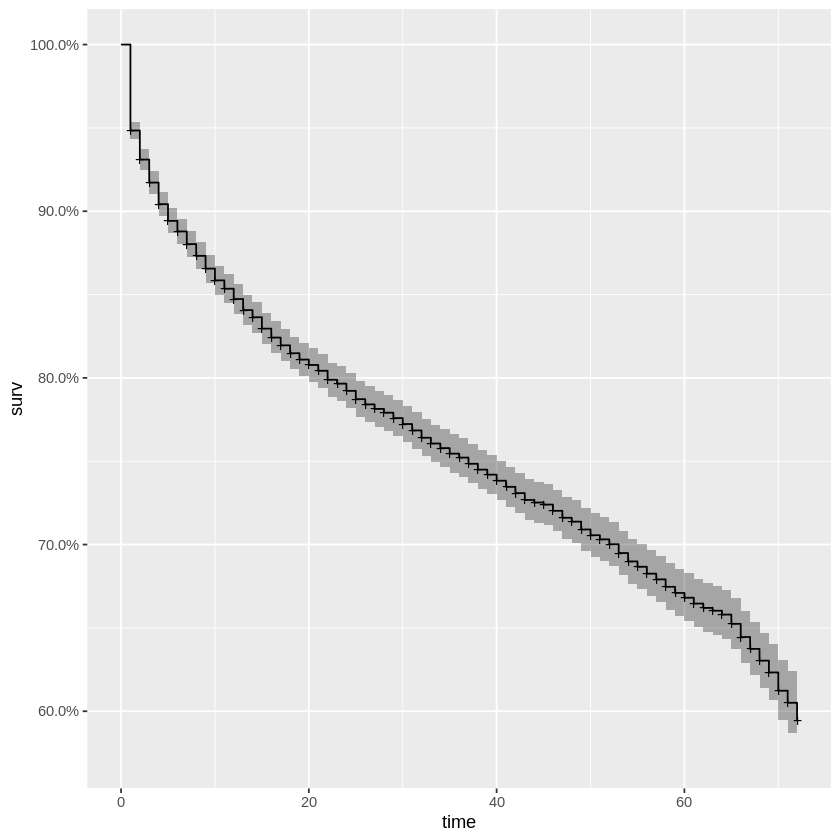

In [67]:
# Nelson-Aalen non parametric analysis
nasurvival <- survfit(coxph(Surv(dados$tenure, dados$Churn)~1), type = "aalen")
summary(nasurvival)
autoplot(nasurvival)

Análises mais interessantes buscam examinar a relação entre a sobrevida (tipicamente na forma de uma função hazard) e algumas covariáveis.

when covariates are time-dependent and the cox model cant be used, one can use an additive hazards model, as even if effects of covariates are proportional, the coefficient of proportionality can change over time -> aalen additive model

avaliar modelo de cox: concordance index - generalization of the area under the ROC curve (auc)
* 0.5 being expected result for random predictions, 1 is perfect concordance;a good model has concordance scores largen than 0.6


In [68]:
# Cox proportional hazard model - coefficientes and hazard rates
# Regressao de cox 
coxphh <- coxph(Surv(tenure, Churn) ~  SeniorCitizen + Partner + 
                  Dependents + InternetService + Contract + PaperlessBilling + PaymentMethod +
                  MonthlyCharges + TotalCharges, method = "breslow", data = dados)

summary(coxphh)

Call:
coxph(formula = Surv(tenure, Churn) ~ SeniorCitizen + Partner + 
    Dependents + InternetService + Contract + PaperlessBilling + 
    PaymentMethod + MonthlyCharges + TotalCharges, data = dados, 
    method = "breslow")

  n= 6609, number of events= 1747 

                                           coef  exp(coef)   se(coef)       z
SeniorCitizen1                        5.339e-02  1.055e+00  5.781e-02   0.924
PartnerYes                           -1.735e-01  8.407e-01  5.675e-02  -3.058
DependentsYes                        -8.922e-02  9.146e-01  7.151e-02  -1.248
InternetServiceFiber optic            5.789e-01  1.784e+00  1.034e-01   5.601
InternetServiceNo                    -1.238e+00  2.899e-01  1.504e-01  -8.232
ContractOne year                     -1.345e+00  2.606e-01  1.025e-01 -13.120
ContractTwo year                     -3.724e+00  2.414e-02  2.023e-01 -18.406
PaperlessBillingYes                   1.698e-01  1.185e+00  5.869e-02   2.894
PaymentMethodCredit card (automati

**interpretacao: olhar para o exp(coef); se for >1, ele aumenta a taxa de risco; se menor, aumenta a sobrevida**

pela interpretacao: os fatores que fazem com que os clientes deem churn esta mais relacionado a tecnologia (e talvez disponibilidade de outros servicos). Pode-se notar que os clientes tradicionais, sem serviço de internet e com cobranças em papel possuem baixissimo risco de churn.

os maiores problemas são os que clientes que possuem fibra ótica, possuem cobranca sem papel (pagam em cheque eletronico)

idosos tem ligeiramente mais churn (nao tao expressivo e pode estar relacionado a um churn inevitavel - a idade impossibilita o uso, ou nao ha mais razao para o uso)

In [69]:
# test assumption of proportional hazards; it tests correlation between the schoenfeld residuals 
# and (transformed)time using a chi-square test
cox.zph(coxphh)

                   chisq df       p
SeniorCitizen      18.88  1 1.4e-05
Partner            12.93  1 0.00032
Dependents          4.80  1 0.02842
InternetService  2001.38  2 < 2e-16
Contract            2.95  2 0.22869
PaperlessBilling   67.52  1 < 2e-16
PaymentMethod      98.40  3 < 2e-16
MonthlyCharges   2708.80  1 < 2e-16
TotalCharges     1357.37  1 < 2e-16
GLOBAL           2864.23 13 < 2e-16

significancia estatistica aqui e ruim: remover as variaveis se quiser manter cox proportional hazards
